# Export PPOAgent - ActorCriticNetwork

In [1]:
import tensorflow as tf
import numpy as np
from tf_agents.agents.ppo.ppo_kl_penalty_agent import PPOKLPenaltyAgent
from tf_agents.networks.actor_distribution_network import ActorDistributionNetwork
from tf_agents.networks.value_network import ValueNetwork
from tf_agents.environments import tf_py_environment
from agent.rl_env.DoomEnviroment import DoomEnvironment
import matplotlib.pyplot as plt
import collections
import joblib
from tqdm import tqdm

## Create Agent, Load Checkpoints, Flatten Model and Save it

In [2]:
CPT_DIR = '/home/jupyter/train_data/agentV2.9/train/policy'
CHECKPOINT_NO = 19000
NO_OF_DATA_POINTS = 10000

In [43]:
env = DoomEnvironment(
    config_name='agent/rl_env/custom.cfg', 
    frame_skip=4, 
    episode_timeout=2000, 
    obs_shape=(60, 100),
    start_ammo=6, 
    living_reward=3, 
    kill_imp_reward=100, 
    kill_demon_reward=10, 
    ammo_reward=5, 
    health_reward=.5
)
tfpy_env = tf_py_environment.TFPyEnvironment(env)

In [4]:
actor_net = ActorDistributionNetwork(
    input_tensor_spec=tfpy_env.observation_spec(),
    output_tensor_spec=tfpy_env.action_spec(),
    fc_layer_params = (200, 100)
)

value_net = ValueNetwork(
    input_tensor_spec=tfpy_env.observation_spec(),
    fc_layer_params = (200, 100)
)

agent = PPOKLPenaltyAgent(
    time_step_spec=tfpy_env.time_step_spec(),
    action_spec=tfpy_env.action_spec(),
    actor_net=actor_net,
    value_net=value_net,
    entropy_regularization = 0.0,
    kl_cutoff_factor = 2.0,
    kl_cutoff_coef = 100,
    initial_adaptive_kl_beta = 1.0,
    adaptive_kl_target = 0.01,
    adaptive_kl_tolerance = 0.3,
    normalize_observations = True,
    normalize_rewards = False,
    use_gae = True,
    num_epochs = 25,
)

In [5]:
checkpoint_state = tf.train.get_checkpoint_state(CPT_DIR)
checkpoint_paths = list(checkpoint_state.all_model_checkpoint_paths)
checkpoint = [x for x in checkpoint_paths if str(CHECKPOINT_NO) in x][0]
checkpoint

'/home/jupyter/train_data/agentV2.9/train/policy/ckpt-19000'

In [6]:
policy_checkpoint = tf.train.Checkpoint(policy=agent.policy)
load_status = policy_checkpoint.restore(checkpoint)

In [7]:
agent.actor_net.summary()

Model: "ActorDistributionNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
EncodingNetwork (EncodingNet multiple                  7220300   
_________________________________________________________________
CategoricalProjectionNetwork multiple                  404       
Total params: 7,220,704
Trainable params: 7,220,704
Non-trainable params: 0
_________________________________________________________________


In [8]:
for v in agent.actor_net.variables:
    print(v.name, v.shape)

ActorDistributionNetwork/EncodingNetwork/dense/kernel:0 (36000, 200)
ActorDistributionNetwork/EncodingNetwork/dense/bias:0 (200,)
ActorDistributionNetwork/EncodingNetwork/dense_1/kernel:0 (200, 100)
ActorDistributionNetwork/EncodingNetwork/dense_1/bias:0 (100,)
ActorDistributionNetwork/CategoricalProjectionNetwork/logits/kernel:0 (100, 4)
ActorDistributionNetwork/CategoricalProjectionNetwork/logits/bias:0 (4,)


In [9]:
def flatten_model(model_nested):
    def get_layers(layers):
        layers_flat = []
        for layer in layers:
            try:
                layers_flat.extend(get_layers(layer.layers))
            except AttributeError:
                layers_flat.append(layer)
        return layers_flat

    model_flat = tf.keras.models.Sequential(
        get_layers(model_nested.layers)
    )
    return model_flat

In [10]:
flat_actorNet = flatten_model(agent.actor_net)
flat_actorNet.build(input_shape=(1, 60, 100, 6))
flat_actorNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7200200   
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
logits (Dense)               multiple                  404       
Total params: 7,220,704
Trainable params: 7,220,704
Non-trainable params: 0
_________________________________________________________________


In [11]:
flat_actorNet.save('/home/jupyter/train_data/agentV2.9/actorNet.keras')

## Run Enviroment and Save Observations, Preferences and  Agent's Actions

In [16]:
from imports_data import Trajectory
import random
import matplotlib.pyplot as plt

145 96 178.2843017578125 -120.568603515625
Human angle 180.00000004190952
Human status Attacking Agent


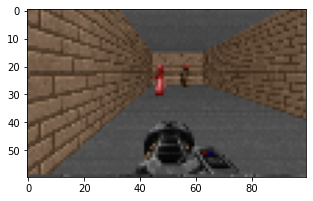

150 96 157.07107543945312 -141.78182983398438
Human angle 225.0000000523869
Human status Attacking Agent


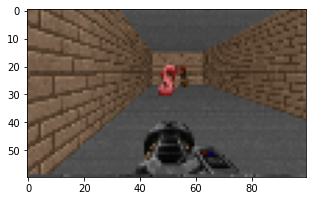

158 97 142.92892456054688 -155.92398071289062
Human angle 225.0000000523869
Human status Attacking Agent


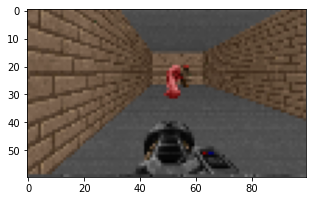

168 95 121.7156982421875 -177.13720703125
Human angle 225.0000000523869
Human status Attacking Agent


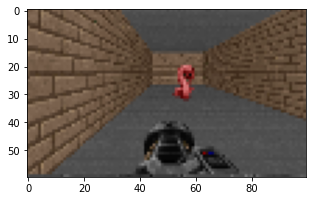

173 95 107.57354736328125 -191.27935791015625
Human angle 225.0000000523869
Human status Attacking Agent


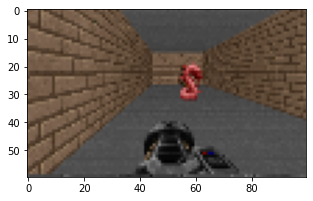

191 95 86.36032104492188 -212.49258422851562
Human angle 225.0000000523869
Human status Attacking Agent


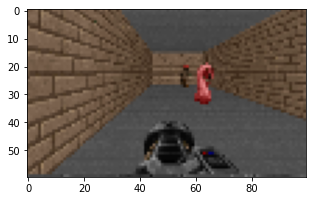

192 94 86.36032104492188 -226.63473510742188
Human angle 225.0000000523869
Human status Attacking Agent


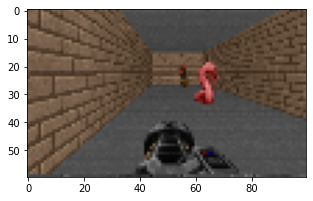

178 93 107.57354736328125 -247.84796142578125
Human angle 135.00000003143214
Human status Attacking Agent


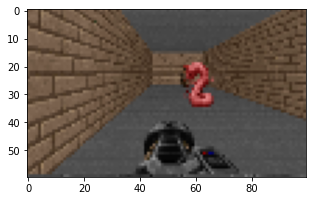

170 91 121.7156982421875 -261.9901123046875
Human angle 135.00000003143214
Human status Attacking Agent


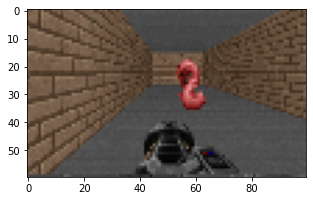

154 91 142.92892456054688 -283.2033386230469
Human angle 135.00000003143214
Human status Attacking Agent


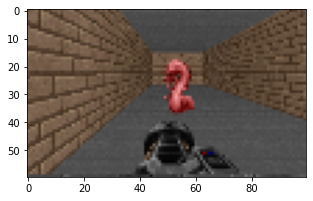

141 90 157.07107543945312 -297.3454895019531
Human angle 135.00000003143214
Human status Attacking Agent


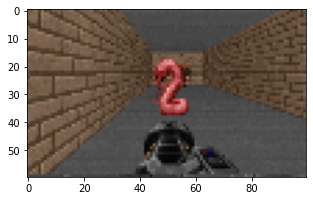

118 87 178.2843017578125 -318.5587158203125
Human angle 135.00000003143214
Human status Attacking Agent


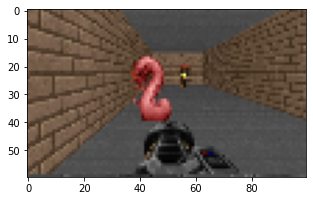

118 88 178.2843017578125 -332.70086669921875
Human angle 135.00000003143214
Human status Attacking Agent


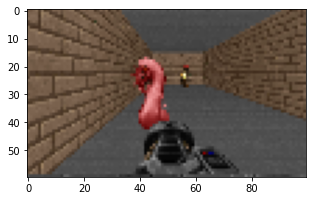

130 85 157.07107543945312 -353.9140930175781
Human angle 225.0000000523869
Human status Attacking Agent


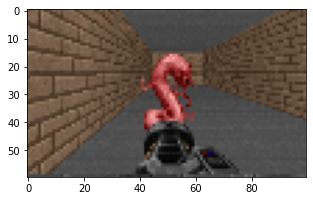

152 81 142.92892456054688 -368.0562438964844
Human angle 225.0000000523869
Human status Attacking Agent


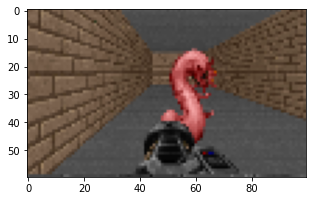

191 80 121.7156982421875 -389.26947021484375
Human angle 225.0000000523869
Human status Attacking Agent


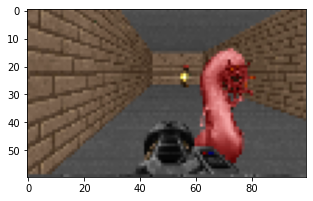

208 73 107.57354736328125 -403.41162109375
Human angle 225.0000000523869
Human status Attacking Agent


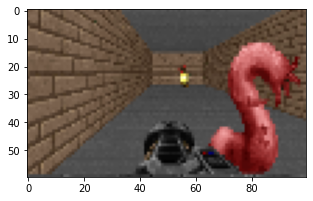

283 88 86.36032104492188 -424.6248474121094
Human angle 225.0000000523869
Human status Attacking Agent


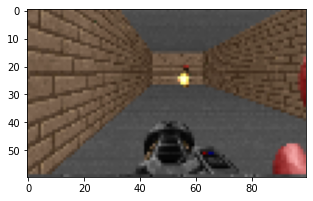

310 99 100.50247192382812 -438.7669982910156
Human angle 180.00000004190952
Human status Attacking Agent


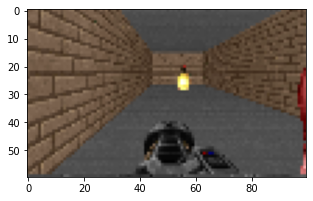

Human status Dead


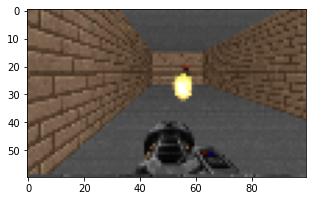

Human status Dead


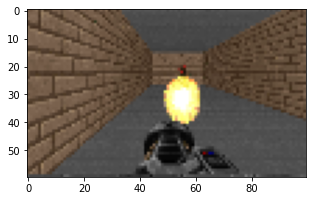

Human status Dead


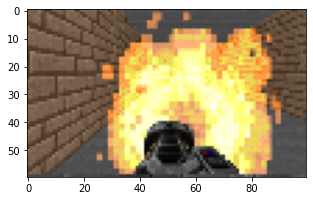

Human status Dead


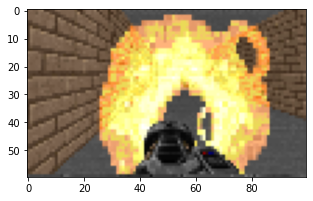

Human status Dead


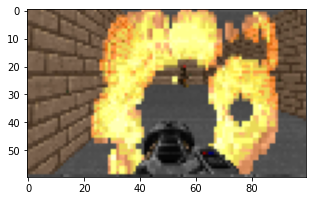

Human status Dead


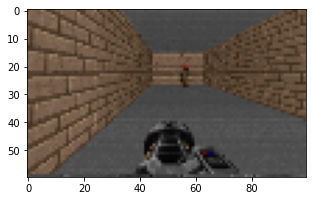

In [59]:
# Verify that labels are extracted correctly
time_step = tfpy_env.reset()
for _ in range(25):
    action_obj = agent.actor_net.call(time_step.observation, time_step.step_type, network_state=())[0]
    action = action_obj.sample().numpy()[0]
    time_step = tfpy_env.step(action=action)
    state = tfpy_env.envs[0]._game.get_state()
    tfpy_env.envs[0]._game.advance_action()
    preference = None
    if state is not None:
        label = [lbl for lbl in state.labels if lbl.object_name == 'Demon']
        if len(label) > 0:
            label = label[0]
            print(label.x, label.y, label.object_position_y, label.object_position_x)
            print('Human angle', label.object_angle)
            if label.object_angle < 90 or label.object_angle > 270:
                preference = 'Attacking Monster'
            else:
                preference = 'Attacking Agent'
        else:
            preference = 'Dead'
        print('Human status', preference)
    plt.figure(figsize=(5,5))
    plt.imshow(time_step.observation[0, :, :, :3])
    plt.show()

In [62]:
time_step = tfpy_env.reset()
observations = []
actions = []
labels = []
for _ in tqdm(range(NO_OF_DATA_POINTS)):
    action_obj = agent.actor_net.call(time_step.observation, time_step.step_type, network_state=())[0]
    action = action_obj.sample().numpy()[0]
    time_step = tfpy_env.step(action=action)
    state = tfpy_env.envs[0]._game.get_state()
    tfpy_env.envs[0]._game.advance_action()
    label = {}
    if state is not None:
        deamons = [lbl for lbl in state.labels if lbl.object_name == 'Demon']
        if len(deamons) > 0:
            label['object_angle'] = int(deamons[0].object_angle)
            label['distance_from_wall'] = abs(deamons[0].object_position_x)
    labels.append(label)
    observations.append(time_step.observation)
    actions.append(action)

100%|██████████| 10000/10000 [01:58<00:00, 84.50it/s]


In [63]:
observations = np.array([ob.numpy()[0] for ob in observations])
actions = np.array(actions)
preferences = np.array(preferences)

In [66]:
exps = Trajectory(
    observation=observations,
    action=actions,
    policy_info={'satisfaction': labels},
    step_type=(),
    next_step_type=(),
    reward=(),
    discount=()
)

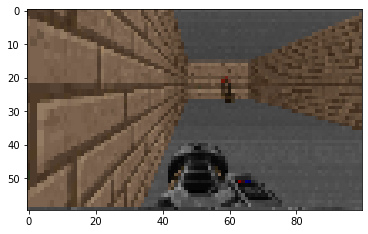

{}


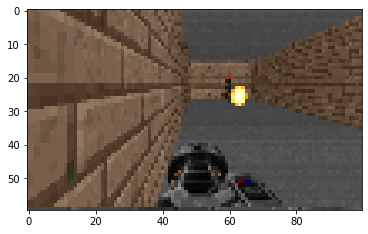

{}


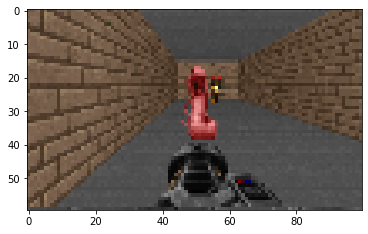

{'object_angle': 180, 'distance_from_wall': 303.4975280761719}


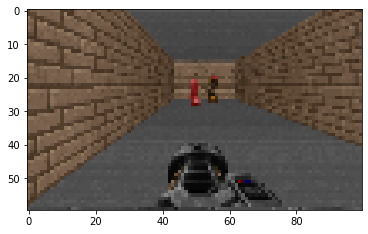

{'object_angle': 0, 'distance_from_wall': 4.0}


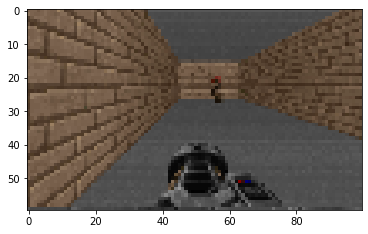

{}


In [92]:
for _ in range(5):
    rand_index = random.randint(0, NO_OF_DATA_POINTS)
    plt.imshow(exps[1][rand_index, :, :, :3])
    plt.show()
    print(exps[3]['satisfaction'][rand_index])

In [93]:
joblib.dump([exps], '/home/jupyter/train_data/agentV2.9/AgentExperienceData.pkl')

['/home/jupyter/train_data/agentV2.9/AgentExperienceData.pkl']